In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\raw_data\cars24_final_data_5.xlsx")

In [7]:
df['ParkingAssistRear']

,content.appointmentId,content.make,content.model,content.variant,content.year,content.transmission,content.bodyType,content.fuelType,content.ownerNumber,content.odometerReading,...,VentilatedSeatsRear,HVACControl,360DegreeCamera,ParkingAssistFront,ParkingAssistSide,DriverSeatAdjustmentElectric,content.fitnessUpto_months_remaining,content.insuranceExpiry_months_remaining,content.lastServicedAt_months_remaining,car_state
1973,10267333796,Mahindra,XUV300,W8 (O) 1.2 PETROL AMT,2022,Automatic,SUV,Petrol,1,11911,...,0,1,0,Sensor,not available,0,150,6,1,KA
1540,10665035705,Honda,Brio,S MT,2017,Manual,Hatchback,Petrol,2,25237,...,0,0,0,NaN,not available,0,91,7,1,MH
2669,14948831789,Honda,Amaze,1.2L I-VTEC VX,2023,Manual,Sedan,Petrol,1,6696,...,0,0,0,NaN,not available,0,162,5,2,KL
1451,10697637717,Mahindra,XUV300,W8 (O) 1.2 PETROL AMT,2021,Automatic,SUV,Petrol,1,19237,...,0,1,0,Sensor,not available,0,135,4,4,MH
2696,17686538721,Maruti,Celerio,ZXI,2018,Manual,Hatchback,Petrol,1,67746,...,0,0,0,NaN,not available,0,104,0,1,BR
1076,21315830741,Renault,TRIBER,RXZ AMT,2020,Automatic,SUV,Petrol,1,39466,...,0,0,0,NaN,not available,0,150,6,1,GJ
100,10013338781,Hyundai,VENUE,S 1.4 CRDI,2020,Manual,SUV,Diesel,1,46446,...,0,0,0,NaN,not available,0,131,3,2,HR


## Analyze Missing Data Patterns

In [4]:
columns_with_missing = df.columns[df.isnull().any()].tolist()
len(columns_with_missing)

14

<Figure size 864x432 with 0 Axes>

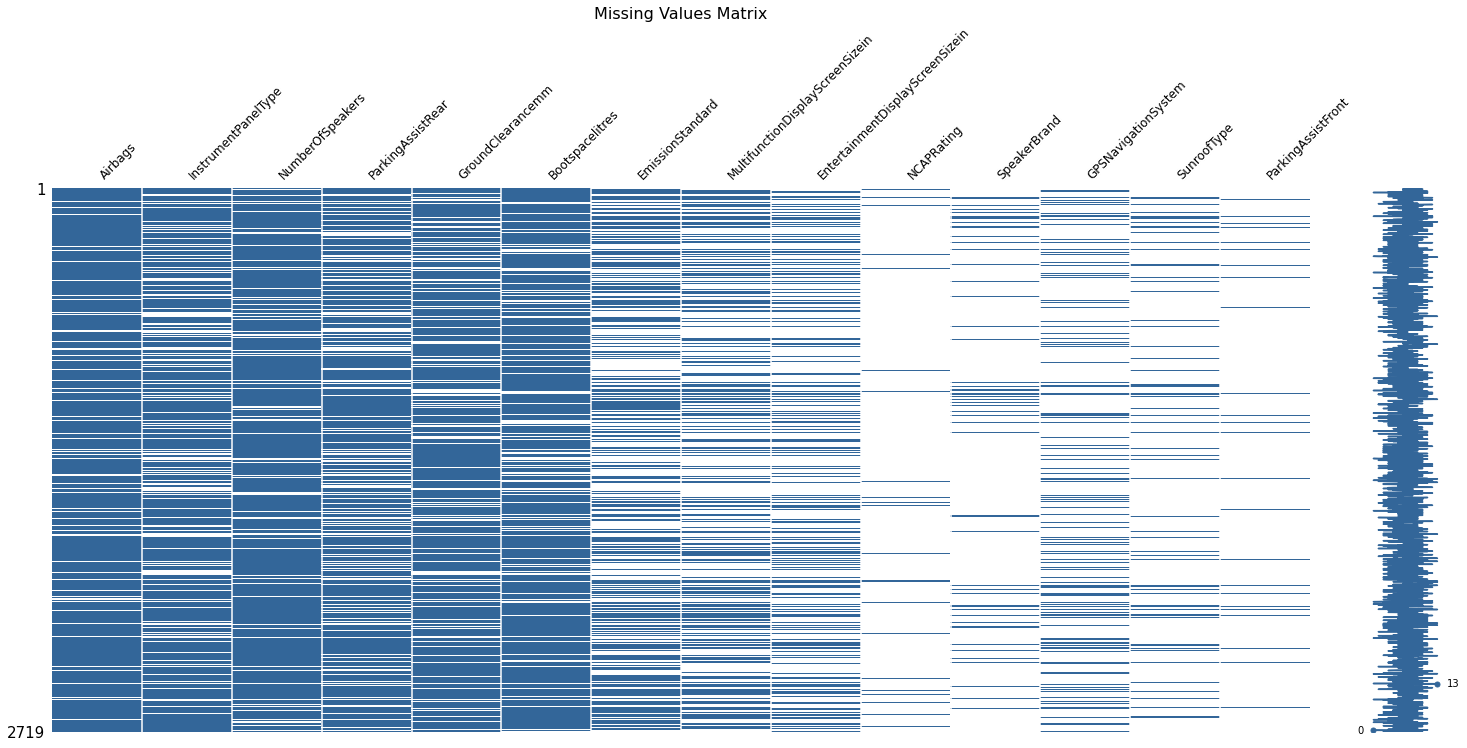

In [10]:
import missingno as msno
import matplotlib.pyplot as plt

# Select columns with missing values
columns_with_missing = df.columns[df.isnull().any()].tolist()
# columns_with_missing = ['ParkingAssistFront','ParkingAssistRear']

subset_df = df[columns_with_missing]

# Set figure size
plt.figure(figsize=(12, 6))

# Visualize the subset with a matrix plot
msno.matrix(subset_df, color=(0.2, 0.4, 0.6), fontsize=12)

# Add a title
plt.title('Missing Values Matrix', fontsize=16)

# Show the plot
plt.show()

## Plan

- Above visualization shows data is missing completly at random, there is no set pattern
- I'll use simple imputation techniques(mean & mode) & (median & mode) to test both 1 by 1
- **Imputing with mode will create imbalance data !!** --- Results might not be reliable
- After that, Perform encoding and perform feature selection/extraction
- Then we'll get some idea which columns are important so we can think of some other imputation techniques !!

In [11]:
df.sample(7)

,content.appointmentId,content.make,content.model,content.variant,content.year,content.transmission,content.bodyType,content.fuelType,content.ownerNumber,content.odometerReading,...,VentilatedSeatsRear,HVACControl,360DegreeCamera,ParkingAssistFront,ParkingAssistSide,DriverSeatAdjustmentElectric,content.fitnessUpto_months_remaining,content.insuranceExpiry_months_remaining,content.lastServicedAt_months_remaining,car_state
2650,13088531742,Tata,NEXON,XMA SUNROOF PETROL,2023,Automatic,SUV,Petrol,1,7413,...,0,0,0,NaN,not available,0,160,16,2,KL
544,10567132799,Maruti,IGNIS,ZETA 1.2 AMT,2022,Automatic,Hatchback,Petrol,1,20115,...,0,0,0,NaN,not available,0,149,5,1,UP
1676,10468438734,Maruti,Celerio,ZXI (O),2017,Manual,Hatchback,Petrol,1,76079,...,0,0,0,NaN,not available,0,93,8,3,TS
1315,10376439750,Mahindra,XUV500,W6,2014,Manual,SUV,Diesel,2,106699,...,0,0,0,NaN,not available,0,60,6,1,MH
366,10041130756,Hyundai,Creta,SX (O) 1.4 TURBO DCT,2020,Automatic,SUV,Petrol,1,57541,...,0,1,0,NaN,not available,1,130,0,3,DL
1993,10275538753,Mahindra,XUV300,W6 1.2 PETROL,2023,Manual,SUV,Petrol,1,10190,...,0,0,0,NaN,not available,0,171,3,4,KA
1121,11409436748,Maruti,Vitara Brezza,ZDI,2018,Manual,SUV,Diesel,2,57887,...,0,0,0,Sensor,not available,0,104,8,1,GJ


In [25]:
numerical_cols = [
    'content.onRoadPrice',
    'content.ownerNumber',
    'content.odometerReading',
    'Airbags',
    'NumberOfSpeakers',
    'Displacementcc',
    'Cylinders',
    'GearBoxNumberOfGears',
    'NumberOfDiscBrakes',
    'GroundClearancemm',
    'SeatingCapacity',
    'Bootspacelitres',
    'Widthmm',
    'Lengthmm',
    'WheelBasemm',
    'FueltankCapacitylitres',
    'MaxPowerbhp',
    'MaxPowerrpm',
    'MaxTorqueNm',
    'defects',
    'repainted',
    'MultifunctionDisplayScreenSizein',
    'EntertainmentDisplayScreenSizein',
    'content.fitnessUpto_months_remaining',
    'content.insuranceExpiry_months_remaining',
    'content.lastServicedAt_months_remaining',
    'NCAPRating',
    'content.year'
]

In [26]:
categorical_cols = ['content.make',
 'content.transmission',
 'content.bodyType',
 'content.fuelType',
 'content.insuranceType',
 'content.duplicateKey',
 'ABSAntilockBrakingSystem',
 'InstrumentPanelType',
 'AirConditioner',
 'PowerWindowsFront',
 'PowerWindowsRear',
 'SteeringWheelMaterial',
 'ParkingAssistRear',
 '12VPowerOutlet',
 'SeatUpholstery',
 'HeadlampLensType',
 'HeadlampBulbTypeHighBeam',
 'HeadlampBulbTypeLowBeam',
 'RimTypeFrontWheels',
 'RimTypeRearWheels',
 'RemoteTrunkRelease',
 'Cylinders',
 'EmissionStandard',
 'Left Front Tyre',
 'Right Front Tyre',
 'Left Rear Tyre',
 'Right Rear Tyre',
 'Spare Tyre',
 'MultifunctionDisplayScreen',
 'EntertainmentDisplayScreen',
 'VoiceRecognition',
 'SpeakerBrand',
 'SmartCardSmartKey',
 'GPSNavigationSystem',
 'AmbientLighting',
 'SunroofMoonroof',
 'SunroofType',
 'WirelessChargingPad',
 'VentilatedSeatsRear',
 'HVACControl',
 '360DegreeCamera',
 'ParkingAssistFront',
 'ParkingAssistSide',
 'DriverSeatAdjustmentElectric',
 'car_state','content.model',
 'content.variant'
]

In [16]:
len(numerical_cols) + len(categorical_cols)

70

In [18]:
df.shape

(2719, 75)

In [19]:
all_cols = df.columns.tolist()

In [27]:
# Convert lists to sets for efficient operations
set_col1 = set(numerical_cols)
set_col2 = set(categorical_cols)
set_all_col = set(all_cols)

# Find elements in all_col but not in col1 and col2
missing_cols = set_all_col - set_col1 - set_col2

{'content.appointmentId'}


In [21]:
missing_cols

{'NCAPRating',
 'car_state',
 'content.appointmentId',
 'content.model',
 'content.variant',
 'content.year'}

In [28]:
len(numerical_cols) + len(categorical_cols) == df.shape[1]

True

## Applying Simple Imputation Techniques

In [29]:
from sklearn.impute import SimpleImputer

In [31]:
# numerical_cols
# categorical_cols


# Step 2: Impute DataFrame 1 (mean for numerical, mode for categorical)
# First DataFrame: Mean and Mode Imputation
imputer_mean_mode = SimpleImputer(strategy='most_frequent')  # Mode for categorical
df_mean_mode = df.copy()
df_mean_mode[categorical_cols] = imputer_mean_mode.fit_transform(df_mean_mode[categorical_cols])

imputer_mean = SimpleImputer(strategy='mean')  # Mean for numerical
df_mean_mode[numerical_cols] = imputer_mean.fit_transform(df_mean_mode[numerical_cols])

# Step 3: Impute DataFrame 2 (median for numerical, mode for categorical)
# Second DataFrame: Median and Mode Imputation
imputer_median_mode = SimpleImputer(strategy='most_frequent')  # Mode for categorical
df_median_mode = df.copy()
df_median_mode[categorical_cols] = imputer_median_mode.fit_transform(df_median_mode[categorical_cols])

imputer_median = SimpleImputer(strategy='median')  # Median for numerical
df_median_mode[numerical_cols] = imputer_median.fit_transform(df_median_mode[numerical_cols])

## Applying KNN for missing value imputation

- label encode categorical columns, impute using KNN & then decode encoded values back to original labels

In [37]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Step 2: Label Encoding for categorical columns
# Label encode categorical columns so KNNImputer can handle them
le_dict = {}  # Dictionary to store label encoders for categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string if not already
    le_dict[col] = le  # Store the encoder for later use

# Step 3: Apply KNNImputer to the combined DataFrame (numerical and encoded categorical)
knn_imputer = KNNImputer(n_neighbors=3)

# Impute the missing values for both numerical and categorical columns (encoded)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Step 4: Decode categorical columns back to the original labels
for col, le in le_dict.items():
    df_knn_imputed[col] = le.inverse_transform(df_knn_imputed[col].round().astype(int))  # Decode back to original categorical labels

In [39]:
# display max row & columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

### View missing value in each dataframe before & after imputation

In [41]:
pd.DataFrame({
    'Original Missing': df.isnull().sum(),
    'Mean-Mode Imputed Missing': df_mean_mode.isnull().sum(),
    'Median-Mode Imputed Missing': df_median_mode.isnull().sum(),
    'KNN Imputed Missing': df_knn_imputed.isnull().sum()
})

,Original Missing,Mean-Mode Imputed Missing,Median-Mode Imputed Missing,KNN Imputed Missing
content.appointmentId,0,0,0,0
content.make,0,0,0,0
content.model,0,0,0,0
content.variant,0,0,0,0
content.year,0,0,0,0
content.transmission,0,0,0,0
content.bodyType,0,0,0,0
content.fuelType,0,0,0,0
content.ownerNumber,0,0,0,0
content.odometerReading,0,0,0,0


## Apply OHE & Label encoding  on each dataframe

In [47]:
# Apply OHE to the Mean-Mode Imputed DataFrame
df_mean_mode_ohe = pd.get_dummies(df_mean_mode, columns=categorical_cols, drop_first=True)

# Apply OHE to the Median-Mode Imputed DataFrame
df_median_mode_ohe = pd.get_dummies(df_median_mode, columns=categorical_cols, drop_first=True)

# Apply OHE to the KNN Imputed DataFrame
df_knn_imputed_ohe = pd.get_dummies(df_knn_imputed, columns=categorical_cols, drop_first=True)

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [51]:
print("Mean-Mode Imputed DataFrame with OHE:")
print(df_mean_mode_ohe.shape)

print("\nMedian-Mode Imputed DataFrame with OHE:")
print(df_median_mode_ohe.shape)

print("\nKNN Imputed DataFrame with OHE:")
print(df_knn_imputed_ohe.shape)

Mean-Mode Imputed DataFrame with OHE:
(2719, 817)

Median-Mode Imputed DataFrame with OHE:
(2719, 817)

KNN Imputed DataFrame with OHE:
(2719, 824)


## Exporting data

In [53]:
df_mean_mode_ohe.to_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\model_ready_data\df_mean_mode_ohe.xlsx", index=False)
df_median_mode_ohe.to_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\model_ready_data\df_median_mode_ohe.xlsx", index=False)
df_knn_imputed_ohe.to_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\model_ready_data\df_knn_imputed_ohe.xlsx", index=False)